In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def count_images_in_subfolders(base_path):
    counts = {}
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            counts[folder] = len(os.listdir(folder_path))
    return counts

In [3]:
train_path = 'images/train'
validation_path = 'images/validation'

In [4]:
train = count_images_in_subfolders(train_path)
validation = count_images_in_subfolders(validation_path)

In [5]:
train.keys()

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

In [6]:
train.values()

dict_values([3993, 436, 4103, 7164, 4982, 4938, 3205])

In [7]:
validation.keys()

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

In [8]:
validation.values()

dict_values([960, 111, 1018, 1825, 1216, 1139, 797])

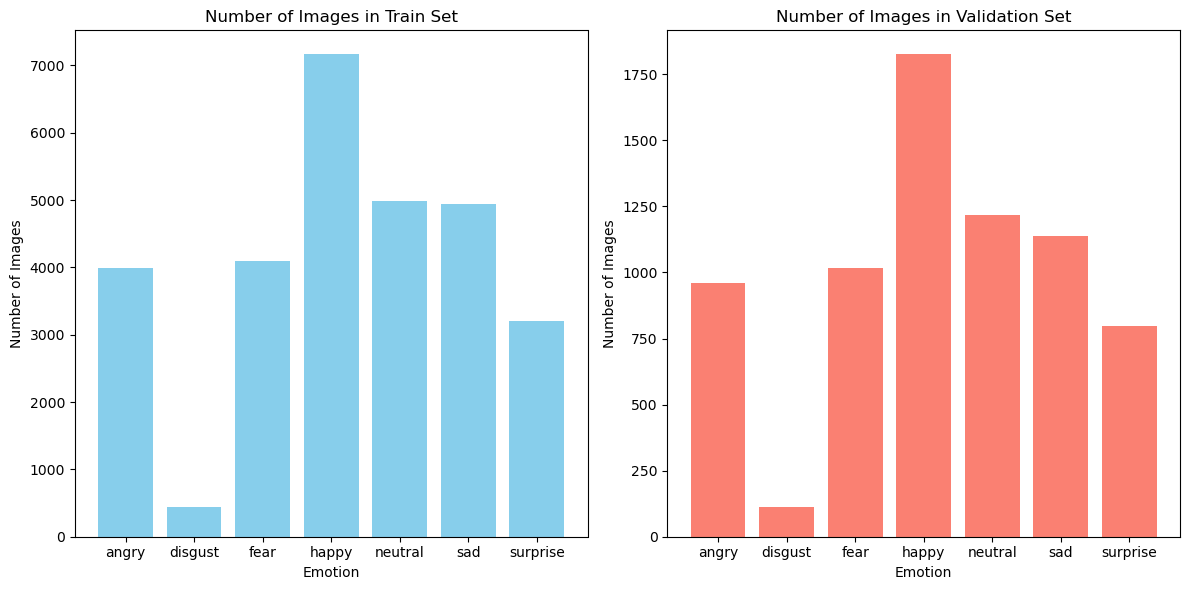

In [9]:
# Plotting the data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Train data plot
ax[0].bar(train.keys(), train.values(), color='skyblue')
ax[0].set_title('Number of Images in Train Set')
ax[0].set_xlabel('Emotion')
ax[0].set_ylabel('Number of Images')

# Validation data plot
ax[1].bar(validation.keys(), validation.values(), color='salmon')
ax[1].set_title('Number of Images in Validation Set')
ax[1].set_xlabel('Emotion')
ax[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

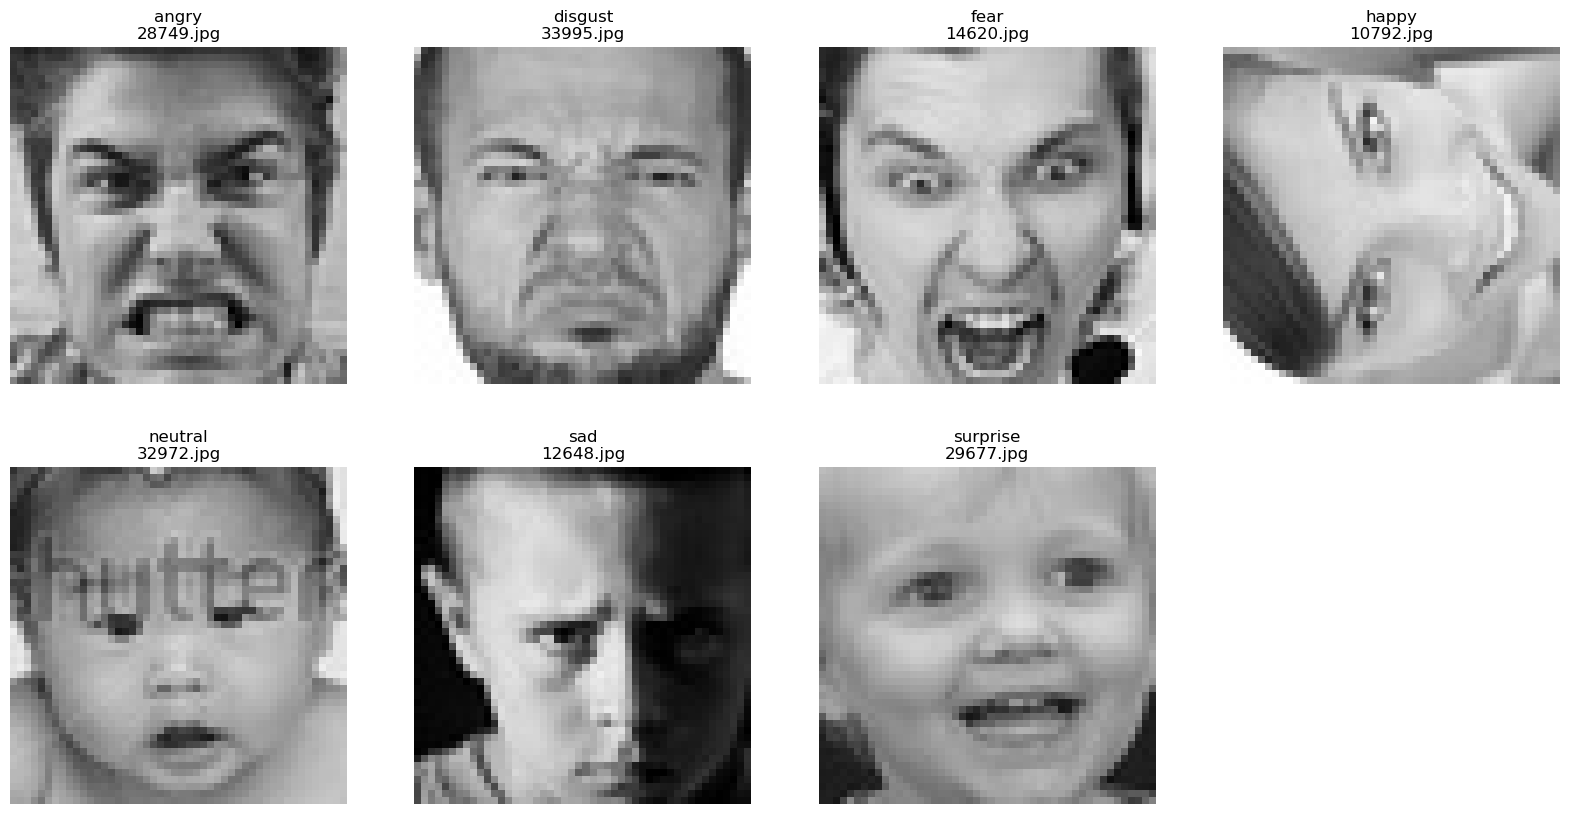

In [17]:
base_folder = 'images/validation'

def load_random_image_from_folder(folder):
    filenames = [f for f in os.listdir(folder) if f.endswith('.jpg') or f.endswith('.png')]
    if filenames:
        random_filename = np.random.choice(filenames)
        img_path = os.path.join(folder, random_filename)
        try:
            with Image.open(img_path) as img:
                img_rgb = img.convert('RGB')
                return np.array(img_rgb), random_filename
        except Exception as e:
            print(f"Error loading image {random_filename}: {e}")
    return None, None

def display_random_image_from_subfolders(base_folder):
    subfolders = [os.path.join(base_folder, subfolder) for subfolder in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, subfolder))]
    
    plt.figure(figsize=(20, 10))
    
    for i, subfolder in enumerate(subfolders):
        img, filename = load_random_image_from_folder(subfolder)
        if img is not None:
            plt.subplot(2, 4, i + 1)
            plt.imshow(img)
            plt.title(f"{os.path.basename(subfolder)}\n{filename}")
            plt.axis('off')
    
    plt.show()

# Hiển thị một ảnh bất kỳ từ mỗi tệp con
display_random_image_from_subfolders(base_folder)


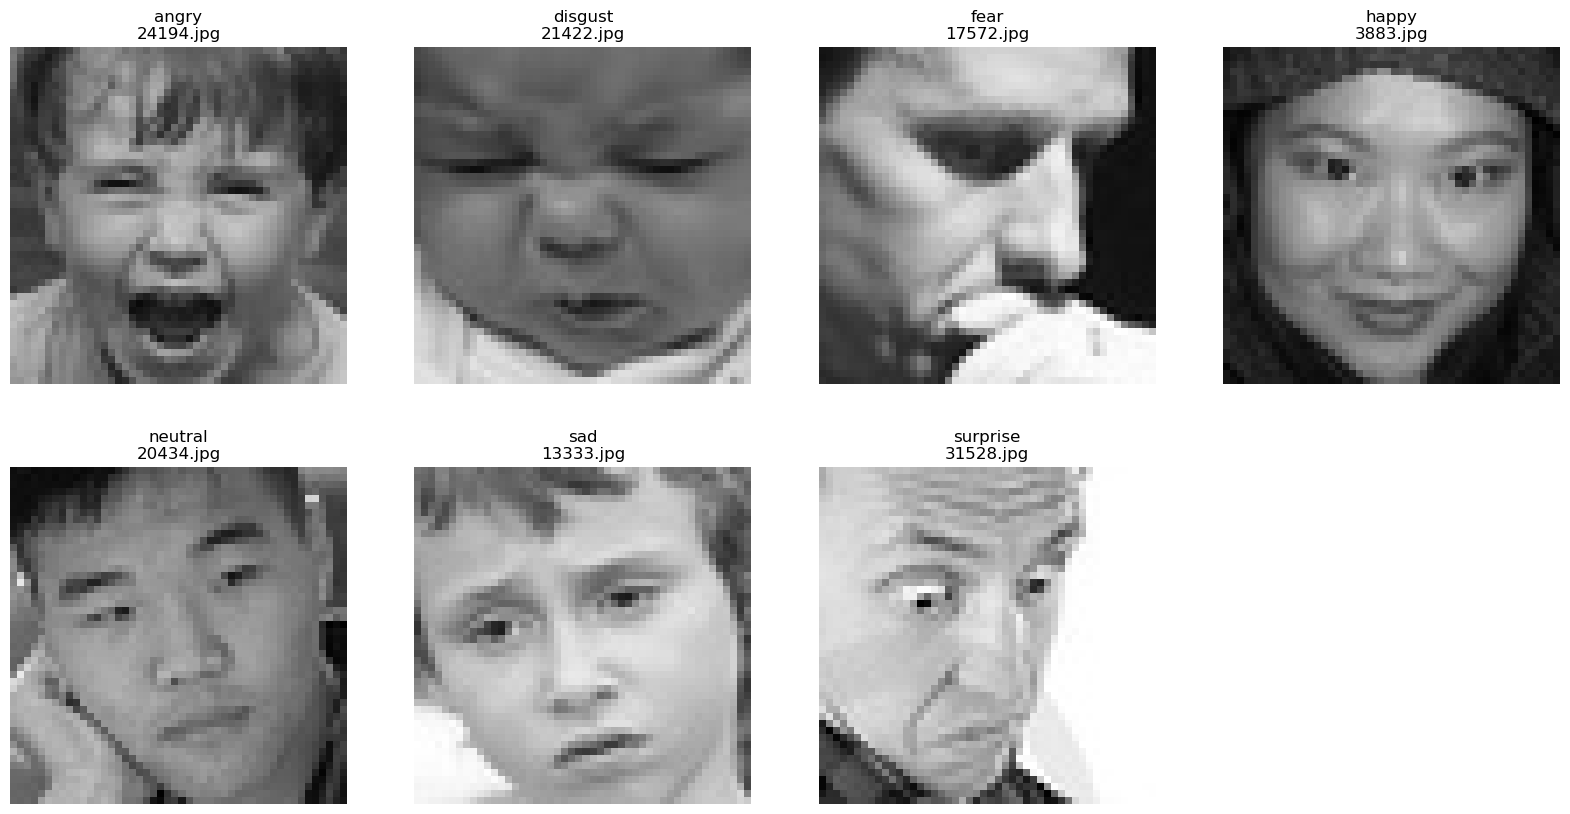

In [18]:
display_random_image_from_subfolders("images/train")